In [1]:
import numpy as np
import os
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time

In [21]:
from tensorflow.keras.models import load_model

model1 = load_model('D:\\FINAL MAJOR20-2\\CNN\\cnn0.h5')
model2 = load_model('D:\\FINAL MAJOR20-2\\VGG16\\vgg.h5')
model3 = load_model('D:\\FINAL MAJOR20-2\\CNN_RNN\\cnn_rnn100.h5')
model4 = load_model('D:\\FINAL MAJOR20-2\\resnet\\resnet.h5')
model5 = load_model('D:\\FINAL MAJOR20-2\\ResnetMobile\\resnetMobile.h5')
model6 = load_model('D:\\FINAL MAJOR20-2\\ResnetMobile_VGG\\resnetMobile_vgg_combined.h5')
model7 = load_model('D:\\FINAL MAJOR20-2\\VGG-lstm\\vgg-lstm.h5')
model8 = load_model('D:\\FINAL MAJOR20-2\\GLCM-LSTM\\kaggleDataset\\before_Kfold\\GLCM_LSTM.h5')

In [15]:
model=model1

In [12]:
# Define constants
IMAGE_SIZE = (112, 80)
BATCH_SIZE = 16
EPOCHS = 100
NUM_CLASSES = 13
TRAIN_DATA_DIR = "D:\\FINAL MAJOR20-2\\output_denoised_image_folder"

# Create a new data generator for the test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Generate the test data generator
test_generator = test_datagen.flow_from_directory(
    directory="D:\\FINAL MAJOR20-2\\output_denoised_image_folder",  # Specify the directory argument
    target_size=IMAGE_SIZE,
    batch_size=1,  # Use batch size 1 for single image prediction
    class_mode='categorical',
    shuffle=False  # Keep the order of predictions
)

# Get the number of samples in the test set
num_test_samples = test_generator.samples

# Get the predictions for the test set
y_pred = model.predict(test_generator, steps=num_test_samples)

# Get the ground truth labels for the test set
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Convert class labels to numeric labels
numeric_labels = [test_generator.class_indices[label] for label in class_labels]

# Map numeric labels to class labels
numeric_to_label = dict(zip(numeric_labels, class_labels))

# Map numeric predictions to class labels
y_pred_labels = [numeric_to_label[label] for label in y_pred_classes]

# Convert ground truth labels to class labels
y_true_labels = [numeric_to_label[label] for label in y_true]

# Display the class labels and their numeric mappings
print("Class Labels:")
print(class_labels)
print("Numeric Labels:")
print(numeric_labels)

# Display the true and predicted labels for the test set
print("True Labels:")
print(y_true_labels)
print("Predicted Labels:")
print(y_pred_labels)

# Calculate the accuracy on the test set
test_acc = np.sum(y_pred_classes == y_true) / num_test_samples
print(f'Test Accuracy: {test_acc * 100}')


Found 104 images belonging to 13 classes.
Class Labels:
['a', 'bye', 'can', 'cat', 'demo', 'dog', 'hello', 'here', 'is', 'lips', 'my', 'read', 'you']
Numeric Labels:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
True Labels:
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'bye', 'can', 'can', 'can', 'can', 'can', 'can', 'can', 'can', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'demo', 'demo', 'demo', 'demo', 'demo', 'demo', 'demo', 'demo', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'hello', 'here', 'here', 'here', 'here', 'here', 'here', 'here', 'here', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'lips', 'lips', 'lips', 'lips', 'lips', 'lips', 'lips', 'lips', 'my', 'my', 'my', 'my', 'my', 'my', 'my', 'my', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you']
Predicted Labels:
['a', 'a', 'a',

In [ ]:
# Assuming X_test and y_test are your test data and labels
y_pred_model1 = model1.predict(test_generator)
y_pred_model2 = model2.predict(test_generator)


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))

# Calculate the ROC curve and AUC score for model1
fpr_model1, tpr_model1, _ = roc_curve(y_true_binarized.ravel(), y_pred_model1.ravel())
auc_model1 = roc_auc_score(y_true_binarized, y_pred_model1, average='micro')

# Calculate the ROC curve and AUC score for model2
fpr_model2, tpr_model2, _ = roc_curve(y_true_binarized.ravel(), y_pred_model2.ravel())
auc_model2 = roc_auc_score(y_true_binarized, y_pred_model2, average='micro')


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Define constants
NUM_CLASSES = 13

# Load the models using K-fold cross-validation
model_paths = [
    ['D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN\\cnn_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN\\cnn_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN\\cnn_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN\\cnn_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN\\cnn_kfold(1)_5.h5'],
    ['D:\\FINAL MAJOR20-2\\ALL MODELS\\VGG_LSTM\\VGG-lstm_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\VGG_LSTM\\VGG-lstm_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\VGG_LSTM\\VGG-lstm_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\VGG_LSTM\\VGG-lstm_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\VGG_LSTM\\VGG-lstm_kfold(1)_5.h5'],
    ['D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN_RNN\\cnn-rnn_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN_RNN\\cnn-rnn_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN_RNN\\cnn-rnn_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN_RNN\\cnn-rnn_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\CNN_RNN\\cnn-rnn_kfold(1)_4.h5'],

    ['D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile\\resnetMobile_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile\\resnetMobile_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile\\resnetMobile_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile\\resnetMobile_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile\\resnetMobile_kfold(1)_5.h5'],
    ['D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile_VGG\\resnetMobile-vgg_kfold(1)_1.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile_VGG\\resnetMobile-vgg_kfold(1)_2.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile_VGG\\resnetMobile-vgg_kfold(1)_3.h5', 'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile_VGG\\resnetMobile-vgg_kfold(1)_4.h5',
     'D:\\FINAL MAJOR20-2\\ALL MODELS\\ResnetMobile_VGG\\resnetMobile-vgg_kfold(1)_5.h5'],

    # Add paths for other models similarly
]

models = []
for model_fold_paths in model_paths:
    model_fold = []
    for model_path in model_fold_paths:
        model = load_model(model_path)
        model_fold.append(model)
    models.append(model_fold)

# Get the predictions for the test set
y_preds = []
for model_fold in models:
    model_fold_preds = []
    for model in model_fold:
        model_preds = model.predict(test_generator, steps=num_test_samples)
        model_fold_preds.append(model_preds)
    y_preds.append(model_fold_preds)

# Assuming y_true and y_preds are available
y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))

# Calculate ROC curve and AUC for each model
fprs, tprs, aucs = [], [], []
for model_fold_preds in y_preds:
    model_fpr, model_tpr, model_auc = [], [], []
    for model_preds in model_fold_preds:
        fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), model_preds.ravel())
        auc_score = roc_auc_score(y_true_binarized, model_preds, average='micro')
        model_fpr.append(fpr)
        model_tpr.append(tpr)
        model_auc.append(auc_score)
    fprs.append(model_fpr)
    tprs.append(model_tpr)
    aucs.append(model_auc)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i, model_name in enumerate(['CNN', 'VGG_LSTM', 'CNN_RNN', 'ResnetMobile', 'ResnetMobile_VGG']):  # Add other model names here
    for j, model_fold_name in enumerate([f'fold_{k+1}' for k in range(5)]):
        plt.plot(fprs[i][j], tprs[i][j], label=f'{model_name}_{model_fold_name} (AUC = {aucs[i][j]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


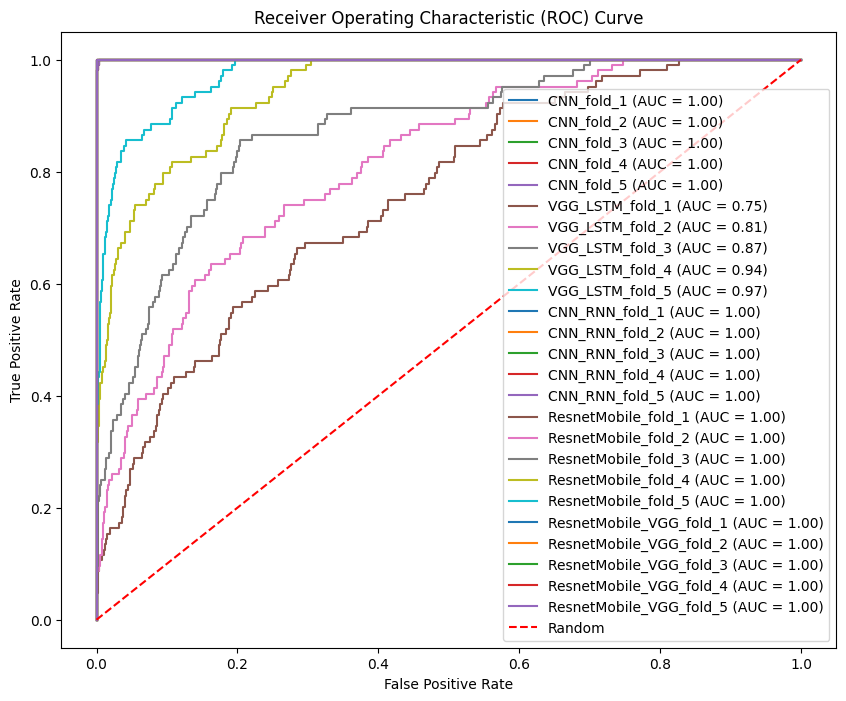

In [15]:
# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i, model_name in enumerate(['CNN', 'VGG_LSTM', 'CNN_RNN', 'ResnetMobile', 'ResnetMobile_VGG']):  # Add other model names here
    for j, model_fold_name in enumerate([f'fold_{k+1}' for k in range(5)]):
        plt.plot(fprs[i][j], tprs[i][j], label=f'{model_name}_{model_fold_name} (AUC = {aucs[i][j]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
